# Pipeline for High-z Radio Galaxies 29: Plot trees from models

In this notebook, we aim to plot the decisions of the trees of models.

In [1]:
%matplotlib inline
# Static plots
#%matplotlib ipympl
# Interactive plots
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as mpe
import sklearn.pipeline
from sklearn import tree
import colorcet as cc
import cmasher as cmr
from pycaret import classification as pyc
from pycaret import regression as pyr
from joblib import dump, load
import pandas as pd

In [2]:
mpl.rcdefaults()

In [3]:
pe1            = [mpe.Stroke(linewidth=5.0, foreground='black'),
                  mpe.Stroke(foreground='white', alpha=1),
                  mpe.Normal()]
pe2            = [mpe.Stroke(linewidth=3.0, foreground='white'),
                  mpe.Stroke(foreground='white', alpha=1),
                  mpe.Normal()]

In [4]:
def get_final_column_names(pycaret_pipeline, sample_df):
    if isinstance(pycaret_pipeline, sklearn.pipeline.Pipeline):
        for (name, method) in pycaret_pipeline.named_steps.items():
            if method != 'passthrough' and name != 'trained_model':
                print(f'Running {name}')
                sample_df = method.transform(sample_df)
        return sample_df.columns.tolist()
    else:
        try:
            for (name, method) in pyr.get_config('prep_pipe').named_steps.items():
                if method != 'passthrough' and name != 'trained_model':
                    print(f'Running {name}')
                    sample_df = method.transform(sample_df)
            return sample_df.columns.tolist()
        except:
            for (name, method) in pyc.get_config('prep_pipe').named_steps.items():
                if method != 'passthrough' and name != 'trained_model':
                    print(f'Running {name}')
                    sample_df = method.transform(sample_df)
            return sample_df.columns.tolist()

In [5]:
def get_base_estimators_names(pycaret_pipeline):
    if isinstance(pycaret_pipeline, sklearn.pipeline.Pipeline):
        estimators  = pycaret_pipeline['trained_model'].estimators
    else:
        estimators  = pycaret_pipeline.estimators

    estimators_list = [estimator[0] for estimator in estimators]
    return estimators_list

---

In [6]:
save_plot_flag      = False
load_models_flag    = True
use_zeroth_model    = False  # Initial model to discriminate between star and non-star objects
use_second_z_model  = False

### Load data

In [7]:
cat_path            = '../../Catalogs/'  # relative path to the same directory

Any of the available areas could be used. But we aim to Stripe 82 since we want to understand, with SHAP, predictions and not training.

In [8]:
used_area           = 'S82'  # can be 'S82', 'HETDEX', 'COSMOS' 

##### Random seed

In [9]:
seed                                = 42

### Load models

In [10]:
if load_models_flag:
    if use_zeroth_model:
        star_clf        = pyc.load_model('models/classification_star_no_star_jun_30_2022')  # star/no-star model
    AGN_gal_clf         = pyc.load_model('models/classification_AGN_galaxy_ago_03_2022')  # classification_AGN_galaxy_may_15_2022
    cal_AGN_gal_clf     = load('models/cal_classification_AGN_galaxy_ago_03_2022.joblib')  # calibrated model
    radio_det_clf       = pyc.load_model('models/classification_radio_detect_ago_02_2022')  # without predicted AGN
    cal_radio_det_clf   = load('models/cal_classification_radio_detect_ago_02_2022.joblib')  # calibrated model
    redshift_reg        = pyr.load_model('models/regression_z_ago_04_2022')  # to use on full sample regression_z_may_17_2022
    if use_second_z_model:
        # redshift_reg_2  = pyr.load_model('models/regression_z_may_31_2022')  # to use on sources with predicted z >= 3.7 (for z >= 4, regression_z_may_31_4_2022)
        # redshift_reg_2  = pyr.load_model('models/regression_z_may_31_4_2022')  # to use on sources with predicted z >= 3.7 (for z >= 4, regression_z_may_31_4_2022)
        # redshift_reg_2  = pyr.load_model('models/regression_z_jun_01_2022')  # to use on sources with predicted z >= 3.7 used with SMOGN
        redshift_reg_2  = pyr.load_model('models/regression_z_jul_19_2022')  # to use on sources with predicted z >= 3.6 used with SMOGN

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [11]:
if use_zeroth_model:
    threshold_star       = 0.37441  # 0.5, 0.15688 from ROC AUC in train+test, 0.37441 from PR curve
threshold_AGN            = 0.44535  # 0.5, 0.3094 from ROC AUC in train+test, 0.31117 from PR curve
threshold_radio          = 0.500005978  # 0.5, 4.99972232e-01, 3.45872868e-01 without including new AGN from ROC AUC in train+test and PR curve

threshold_cal_AGN        = 0.38261  # From calibrated model (probabilities) 0.45148
threshold_cal_radio      = 0.31594  # From calibrated model (probabilities) 0.25453

---

In [13]:
AGN_gal_clf.named_steps['trained_model']

StackingClassifier(cv=5,
                   estimators=[('xgboost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              enable_categorical=False, gamma=0,
                                              gpu_id=-1, importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=6,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='...
                                              scale_pos_weight=1, subsample=1,
                                       

In [14]:
from xgboost import plot_tree

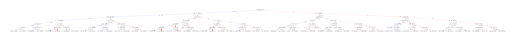

In [15]:
plot_tree(AGN_gal_clf.named_steps['trained_model'].estimators_[0], num_trees=0)
plt.show()

In [23]:
import graphviz

In [16]:
from sklearn import tree

In [49]:
dir(AGN_gal_clf.named_steps['trained_model'].estimators_[3].estimators_[0].tree_)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'apply',
 'capacity',
 'children_left',
 'children_right',
 'compute_feature_importances',
 'compute_partial_dependence',
 'decision_path',
 'feature',
 'impurity',
 'max_depth',
 'max_n_classes',
 'n_classes',
 'n_features',
 'n_leaves',
 'n_node_samples',
 'n_outputs',
 'node_count',
 'predict',
 'threshold',
 'value',
 'weighted_n_node_samples']

In [50]:
AGN_gal_clf.named_steps['trained_model'].estimators_[3].estimators_[0].tree_.max_depth

31

In [53]:
# dot_data = tree.export_graphviz(AGN_gal_clf.named_steps['trained_model'].estimators_[3].estimators_[0], out_file=None) 
# graph    = graphviz.Source(dot_data)
# plt.show()

In [54]:
tree.plot_tree(AGN_gal_clf.named_steps['trained_model'].estimators_[3].estimators_[0])
plt.show()

KeyboardInterrupt: 